In [2]:
from sklearn.datasets import load_svmlight_file
import numpy as np

In [3]:
data=load_svmlight_file(r'F:\\机器学习实验\\australian_scale.txt')

In [4]:
X=data[0]
y=data[1]

In [5]:
X=X.todense()

In [6]:
y=np.reshape(y,(690,1))
y=np.mat(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.3,random_state=47)#分割数据集

In [8]:
n=X_train.shape[0]
X_train=np.hstack((X_train,np.ones((n,1))))
X_train.shape

(483, 15)

In [9]:
n=X_validation.shape[0]
X_validation=np.hstack((X_validation,np.ones((n,1))))
X_validation.shape

(207, 15)

In [10]:
def hingeloss(X,w,y):#hinge loss: w+C*sum(max(0,1-y*(x*w+b)))
    s=0
    for i in range(0,len(w)):
        s=s+w[i]**2
    return s/2+max(0,1-y*(X*w))

In [11]:
def loss(X,w,y):#使用误差率作为loss，阈值为0
    y_predict=X*w
    if(y_predict>=0):
        y_predict=1
    else:
        y_predict=-1
    if(y_predict==y):
        return 0
    else:
        return 1

In [55]:
def gradient(X,w,y):
    (n,m)=X.shape
    s=np.zeros((m,1))
    w[X.shape[1]-1]=0
    for j in range(0,n):
        if(1-X[j]*w*y[j]>0):
            s=s+(X[j].T*y[j])*-1
    return s+w

In [66]:
def train(X_train,X_validation,y_train,y_validation,it,LearningRate):
    w=np.ones((X_train.shape[1],1))
    loss_train=[]
    loss_validation=[]
    time=[]
    for i in range(0,it):
        time.append(i+1)
        gra=gradient(X_train,w,y_train)
        w=w-LearningRate*gra
        err_train=0
        err_validation=0
        for j in range(0,len(y_train)):
            err_train+=hingeloss(X_train[j],w,y_train[j])[0,0]
            #err_train+=loss(X_train[j],w,y_train[j])
        for j in range(0,len(y_validation)):
            err_validation+=hingeloss(X_validation[j],w,y_validation[j])[0,0]
            #err_validation+=loss(X_validation[j],w,y_validation[j])
        loss_train.append(err_train/len(y_train))
        loss_validation.append(err_validation/len(y_validation))
    return time,loss_train,loss_validation,w

In [71]:
time,loss_train,loss_validation,w=train(X_train,X_validation,y_train,y_validation,10,0.001)

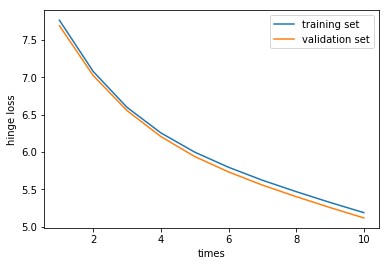

In [72]:
import matplotlib.pyplot as plt
plt.xlabel('times')
plt.ylabel('hinge loss')
plt.plot(time,loss_train,label='training set')
plt.plot(time,loss_validation,label='validation set')
plt.legend()
plt.show()

In [73]:
min(loss_validation)

5.116657927424332

In [74]:
min(loss_train)

5.18740984453422